In [1]:
import os

In [2]:
file_path = r'C:\Users\shlbs\OneDrive - The University of Texas at Austin\Desktop\SRS_Thesis_ShareFolder\_DATA\_AOIs\_CORNUDAS\_FIELD SPEC\Cornudas_Processed_FieldSpec\CND206\CND206_Processed.dat'
if os.path.isfile(file_path):
    print("File exists")
else:
    print("File does not exist")

File exists


In [3]:
import matplotlib.pyplot as plt

In [4]:
import numpy as np

In [5]:
import pandas as pd

In [6]:
encoding = 'UTF-16'

In [7]:
df = pd.read_csv(file_path, delimiter=',', encoding=encoding)

In [8]:
df.head()

,CND20600000.asd,1,350,0.251516265066546
0,CND20600000.asd,2,351,0.257409
1,CND20600000.asd,3,352,0.256123
2,CND20600000.asd,4,353,0.248709
3,CND20600000.asd,5,354,0.244520
4,CND20600000.asd,6,355,0.249632


In [9]:
column_names = ['Unique ID','Iteration', 'Wavelength', 'Absolute_Reflectance']

In [10]:
df.columns = column_names

In [11]:
df.head()

,Unique ID,Iteration,Wavelength,Absolute_Reflectance
0,CND20600000.asd,2,351,0.257409
1,CND20600000.asd,3,352,0.256123
2,CND20600000.asd,4,353,0.248709
3,CND20600000.asd,5,354,0.244520
4,CND20600000.asd,6,355,0.249632


In [12]:
unique_values = df.iloc[:, 0].unique()

C:\Users\shlbs\AppData\Local\Temp\ipykernel_2528\1988907757.py:3: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('viridis', num_colors)


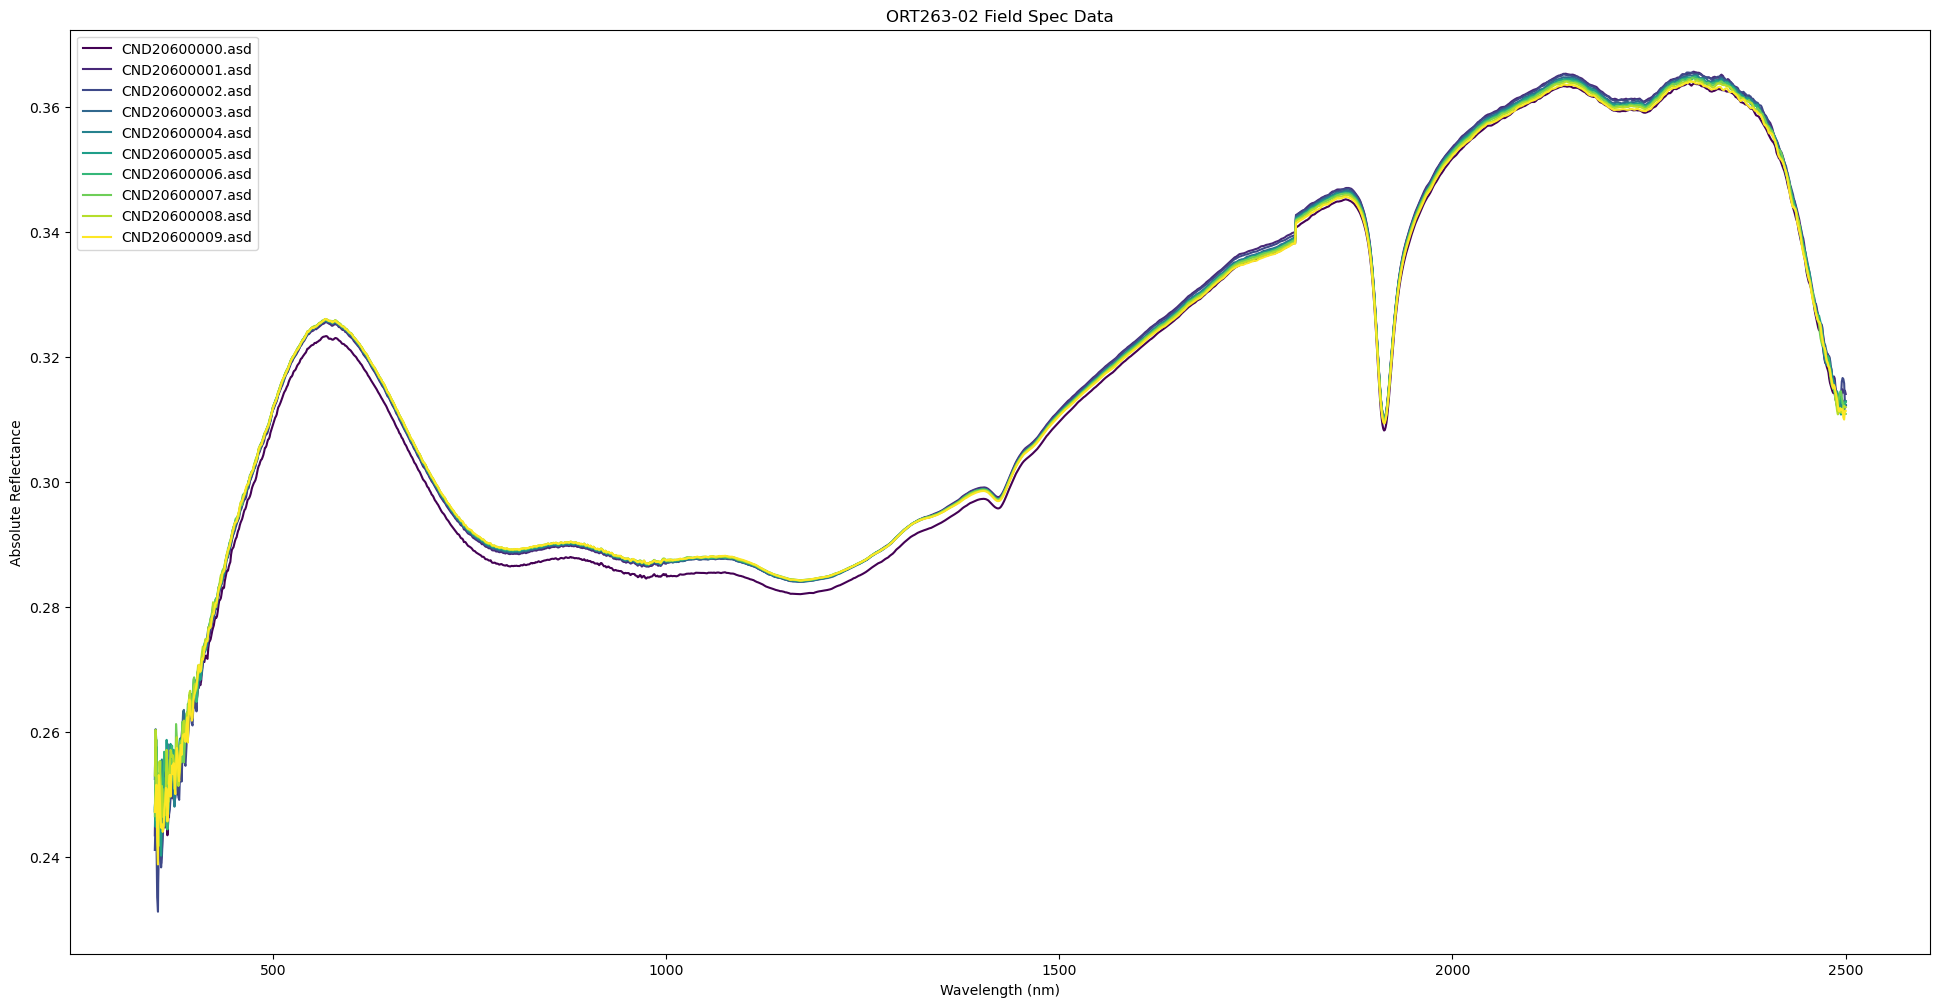

In [13]:
## All spectral signatures
num_colors = len(unique_values)
cmap = plt.cm.get_cmap('viridis', num_colors)  


fig, ax = plt.subplots(figsize=(24, 12))
for idx, value in enumerate(unique_values):
    subset = df[df.iloc[:, 0] == value]
    color = cmap(idx)  # Get color from the colormap
    ax.plot(subset.iloc[:, 2], subset.iloc[:, 3],'-', label=str(value), color=color)


ax.set_xlabel('Wavelength (nm)')
ax.set_ylabel('Absolute Reflectance')
ax.set_title('ORT263-02 Field Spec Data')


handles, labels = ax.get_legend_handles_labels()
custom_legend = [(handle, label) for handle, label in zip(handles, labels)]
ax.legend(*zip(*custom_legend), loc='upper left')


plt.show()

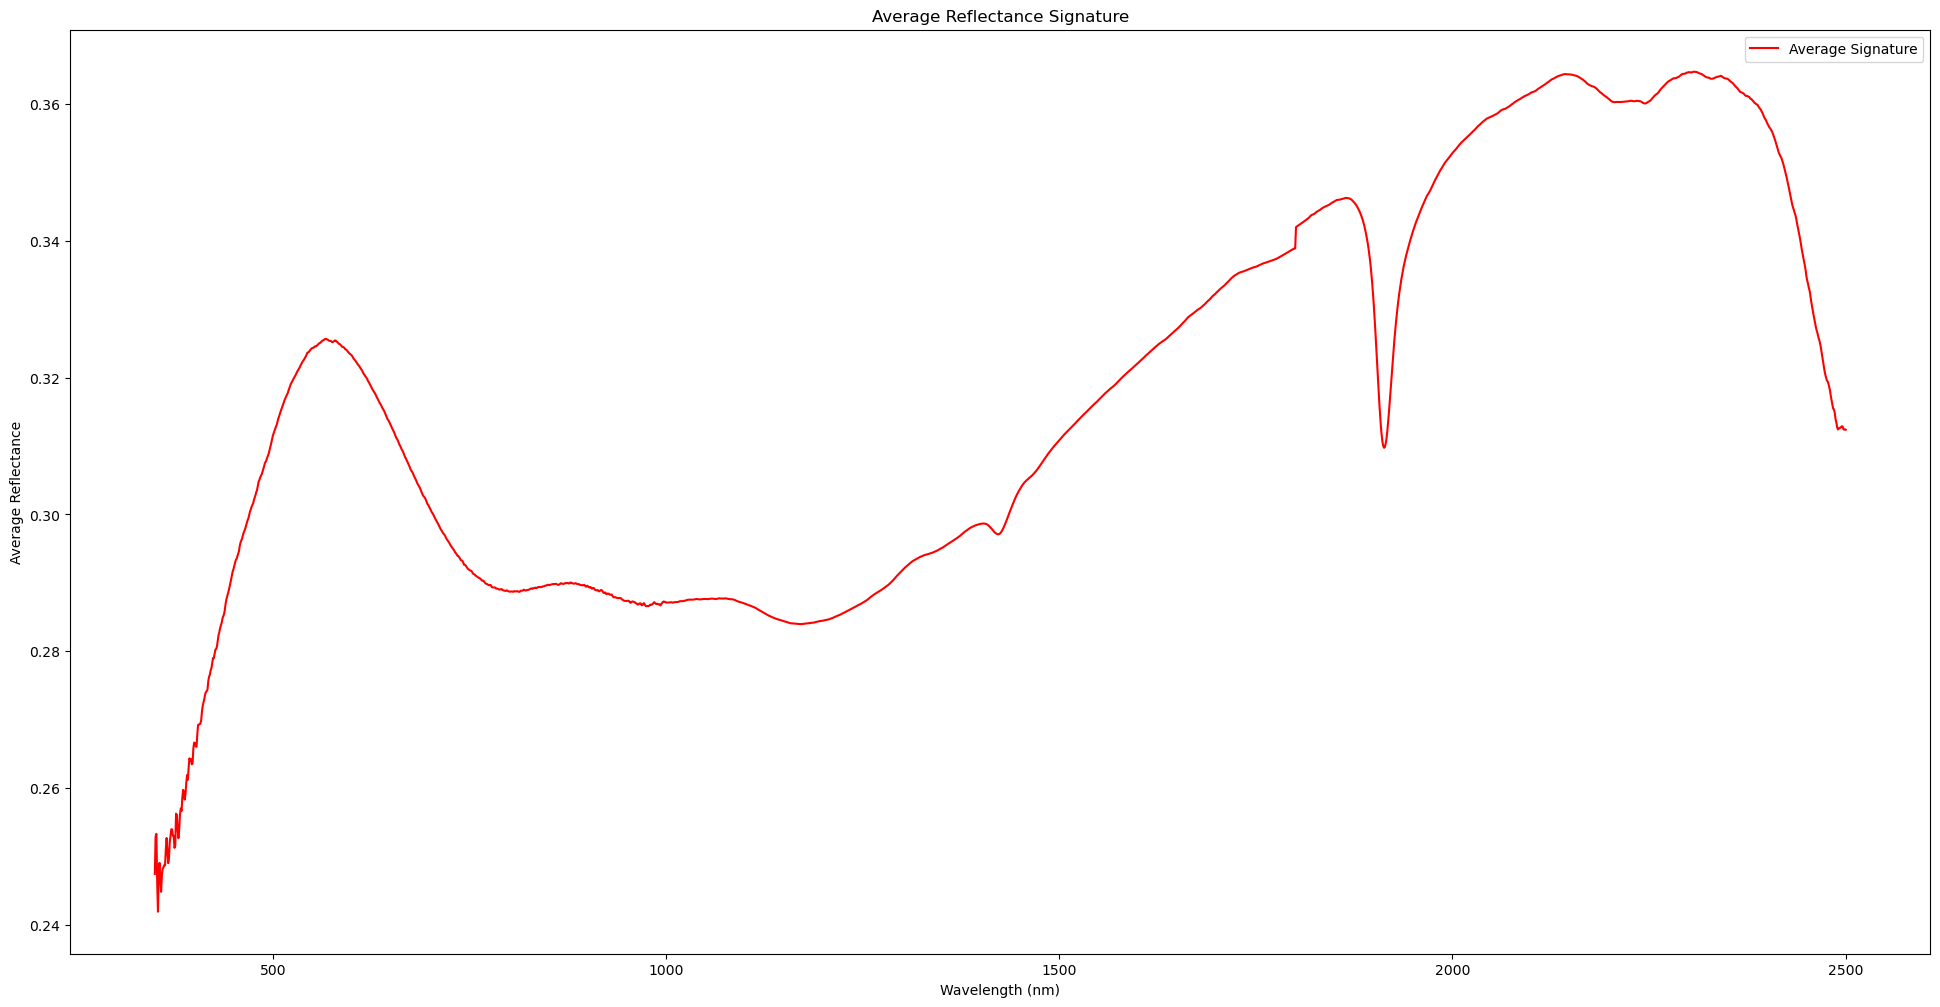

In [14]:
## Average Signature Plot

fig_avg, ax_avg = plt.subplots(figsize=(24, 12))  


average_signature = df.groupby('Wavelength')['Absolute_Reflectance'].mean()  # Assuming column 2 is the wavelength and column 3 is the reflectance


ax_avg.plot(average_signature.index, average_signature.values, 'r-', label='Average Signature') 


ax_avg.set_xlabel('Wavelength (nm)')
ax_avg.set_ylabel('Average Reflectance')
ax_avg.set_title('Average Reflectance Signature')


ax_avg.legend()

plt.show()

C:\Users\shlbs\AppData\Local\Temp\ipykernel_2528\3607859528.py:7: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('Greys', num_colors)


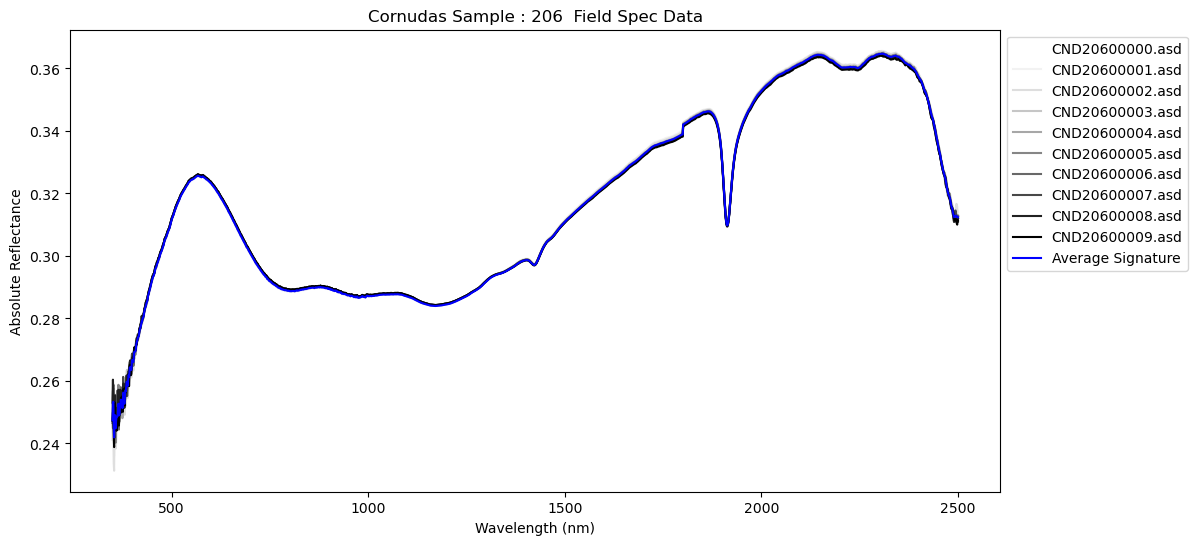

In [15]:
## Average against all

fig, ax = plt.subplots(figsize=(12, 6))
for idx, value in enumerate(unique_values):
    subset = df[df.iloc[:, 0] == value]
    #color = cmap(idx)  # Get color from the colormap
    cmap = plt.cm.get_cmap('Greys', num_colors)
    color = cmap(idx)
    ax.plot(subset.iloc[:, 2], subset.iloc[:, 3],'-', label=str(value), color=color)
ax.plot(average_signature.index, average_signature.values, 'b-', label='Average Signature') 

# Add labels and title
ax.set_xlabel('Wavelength (nm)')
ax.set_ylabel('Absolute Reflectance')
ax.set_title('Cornudas Sample : 206  Field Spec Data')

# Add legend with custom colors
handles, labels = ax.get_legend_handles_labels()
custom_legend = [(handle, label) for handle, label in zip(handles, labels)]
ax.legend(*zip(*custom_legend), loc='upper left', bbox_to_anchor=(1, 1))

# Show the plot
plt.show()
#plt.savefig(r'C:\Users\shlbs\OneDrive - The University of Texas at Austin\Pictures\Thesis\cnd206_3.svg', transparent = False)

C:\Users\shlbs\AppData\Local\Temp\ipykernel_2528\1215876625.py:9: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('Greys', num_colors)


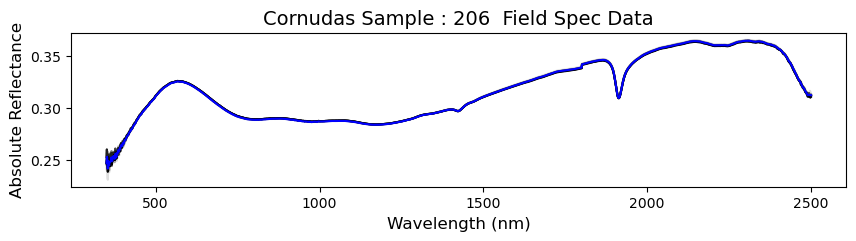

In [16]:
## Figure for paper/presentations

fig, ax = plt.subplots(figsize=(10, 2))

# Plot the data
for idx, value in enumerate(unique_values):
    subset = df[df.iloc[:, 0] == value]
    #color = cmap(idx)  # Get color from the colormap
    cmap = plt.cm.get_cmap('Greys', num_colors)
    color = cmap(idx)
    ax.plot(subset.iloc[:, 2], subset.iloc[:, 3],'-', label=str(value), color=color)
ax.plot(average_signature.index, average_signature.values, 'b-', label='Average Signature') 

# Add labels and title with increased fontsize
ax.set_xlabel('Wavelength (nm)', fontsize=12)
ax.set_ylabel('Absolute Reflectance', fontsize=12)
ax.set_title('Cornudas Sample : 206  Field Spec Data', fontsize=14)

# Add legend with custom colors and increased fontsize
handles, labels = ax.get_legend_handles_labels()
custom_legend = [(handle, label) for handle, label in zip(handles, labels)]
#ax.legend(*zip(*custom_legend), loc='upper left', bbox_to_anchor=(1, 1), fontsize=14)

ax.tick_params(axis='both', which='major', labelsize=10)

# Show the plot
plt.show()

In [17]:
from sklearn.metrics import r2_score

In [18]:
df.head()

,Unique ID,Iteration,Wavelength,Absolute_Reflectance
0,CND20600000.asd,2,351,0.257409
1,CND20600000.asd,3,352,0.256123
2,CND20600000.asd,4,353,0.248709
3,CND20600000.asd,5,354,0.244520
4,CND20600000.asd,6,355,0.249632


In [19]:
average_signature.head()

Wavelength
350    0.247449
351    0.252935
352    0.253324
353    0.246312
354    0.241940
Name: Absolute_Reflectance, dtype: float64

In [20]:
r_squared_values = {}

# Iterate over each wavelength
for wavelength in average_signature.index:
    # Extract the reflectance values for the current wavelength from the dataframe
    reflectance_values = df[df['Wavelength'] == wavelength]['Absolute_Reflectance'].values
    
    # Get the corresponding average signature reflectance value
    average_reflectance = average_signature.loc[wavelength]
    
    # Calculate R^2 value
    r_squared = r2_score(reflectance_values, [average_reflectance] * len(reflectance_values))
    
    # Store the R^2 value in the dictionary
    r_squared_values[wavelength] = r_squared

# Print R^2 values
for wavelength, r_squared in r_squared_values.items():
    print(f"Wavelength {wavelength}: R^2 = {r_squared}")

Wavelength 350: R^2 = 0.0
Wavelength 351: R^2 = 0.0
Wavelength 352: R^2 = 0.0
Wavelength 353: R^2 = 2.220446049250313e-16
Wavelength 354: R^2 = 0.0
Wavelength 355: R^2 = 0.0
Wavelength 356: R^2 = -2.220446049250313e-16
Wavelength 357: R^2 = -2.220446049250313e-16
Wavelength 358: R^2 = 0.0
Wavelength 359: R^2 = 0.0
Wavelength 360: R^2 = -2.220446049250313e-16
Wavelength 361: R^2 = 0.0
Wavelength 362: R^2 = 0.0
Wavelength 363: R^2 = 0.0
Wavelength 364: R^2 = 0.0
Wavelength 365: R^2 = 0.0
Wavelength 366: R^2 = 0.0
Wavelength 367: R^2 = 0.0
Wavelength 368: R^2 = 0.0
Wavelength 369: R^2 = 0.0
Wavelength 370: R^2 = 0.0
Wavelength 371: R^2 = 0.0
Wavelength 372: R^2 = 0.0
Wavelength 373: R^2 = 0.0
Wavelength 374: R^2 = 0.0
Wavelength 375: R^2 = 1.1102230246251565e-16
Wavelength 376: R^2 = 0.0
Wavelength 377: R^2 = -4.440892098500626e-16
Wavelength 378: R^2 = 0.0
Wavelength 379: R^2 = 0.0
Wavelength 380: R^2 = 0.0
Wavelength 381: R^2 = -2.220446049250313e-16
Wavelength 382: R^2 = 0.0
Wavelength

In [ ]:
### THe Next Bit is testing the results of the iterative average against the average from the plot..they should have the same result

In [ ]:
# file_path_2 = r'C:\Users\shlbs\OneDrive - The University of Texas at Austin\Desktop\SierraBlanca_Processed_FieldSpec\ORT263-02\ORT263-02_Average.csv'

In [ ]:
# df_2 = pd.read_csv(file_path_2, delimiter=',')

In [ ]:
# df_2.head()

In [ ]:
# average_signature.head()

In [ ]:
# plt.figure(figsize=(8, 5))  # Adjust the figure size as needed
# plt.plot(df_2['Wavelength (nm)'], df_2['Average Reflectance'], label='Iterative', color='blue')

# # Plot the data from df2 on the same graph
# plt.plot(average_signature.index, average_signature.values, label='Original', color='red')


# # Add labels, title, and legend
# plt.xlabel('Wavelenghth')
# plt.ylabel('Reflectance')
# plt.title('Test Outputs')
# plt.legend()

# # Show the plot
# plt.grid(True)
# plt.show()

In [ ]:
# !pip install scikit-learn

In [ ]:
# import matplotlib.pyplot as plt
# import pandas as pd
# import numpy as np
# from sklearn.metrics import mean_squared_error, mean_absolute_error

In [ ]:
# # Assuming 'df_2' contains 'Wavelength (nm)' and 'Average Reflectance' columns
# plt.figure(figsize=(8, 5))  # Adjust the figure size as needed

# # Plot the data from df_2
# plt.plot(df_2['Wavelength (nm)'], df_2['Average Reflectance'], label='Iterative', color='blue')

# # Plot the data from 'average_signature' Series
# plt.plot(average_signature.index, average_signature.values, label='Original', color='red')

# # Add labels, title, and legend
# plt.xlabel('Wavelength (nm)')
# plt.ylabel('Reflectance')
# plt.title('Test Outputs')
# plt.legend()

# # Show the plot
# plt.grid(True)
# plt.show()

# # Calculate Mean Squared Error (MSE)
# mse = mean_squared_error(df_2['Average Reflectance'], average_signature.values)

# # Calculate Mean Absolute Error (MAE)
# mae = mean_absolute_error(df_2['Average Reflectance'], average_signature.values)

# print(f"Mean Squared Error (MSE): {mse}")
# print(f"Mean Absolute Error (MAE): {mae}")

In [ ]:
## very small errors indicate that the lines are basically identical and the code worked :) 

In [ ]:
## Export

average_signature = df.groupby('Wavelength')['Absolute_Reflectance'].mean().reset_index()  # Reset index to convert groupby result to DataFrame

# Rename columns for clarity
average_signature.columns = ['Wavelength (nm)', 'Average Reflectance']

# Export the average signature to a CSV file
average_signature.to_csv(r'C:\Users\shlbs\OneDrive - The University of Texas at Austin\Desktop\Cornudas_Processed_FieldSpec\CND004\CND004_Average.csv', index=False)